# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 6, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) (the one you have downloaded from Absalon) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. 

## Problems from Exercise Set 2:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 2.3.4:** The code below runs through some of the steps we completed in exercise 2.3.4 in Module 2. As we are not going to request the website but load the data from a csv file, your task is to **rewrite parts of the function**. In particular, you need to do the following:
>1. Rename the function to `process_weather` instead of `load_weather`. 
>2. The function should now  take a `dataframe` as input. 
>3. Consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The documentation string should also be rewritten appropriately. 
>4. The function contains a sorting step. **Change it so that it first sorts by _station_, then by _datetime_. The sorting should be ascending for _station_ and descending for _datetime_.** 
>5. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `process_weather` function to this dataframe, and store the result in the variable `df_weather_period`.

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [1]:
import pandas as pd
import numpy as np

def process_weather(file_name):
    
    """Defines a function for loading the weatherr for a specific year"""
    
    file = f"{file_name}.csv" #Url is defined as an f-string, that loads the url, the year put into the string, is the same as the input in the function    
    
    df_weather = pd.read_csv(file, header=None) #Read the csv and call the dataframe df_weather
        
    column_names = ["station", "datetime", "obs_type", "obs_value"] #Creates a list of column names
    df_weather.columns = column_names #rename
    
    df_weather["obs_value"]=df_weather["obs_value"] / 10 
    
    selection_tmax = df_weather.obs_type == "TMAX" #select only observations where obs_type = "TMAX"
    
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by = ["station", "datetime"], ascending = (True, False)) #sorted by station and datetime
    
    df_reset = df_sorted.reset_index(drop=True) #dropper det gamle index
    
    df_reset["area"]= df_reset["station"].str[:3]   #AREA
    df_reset["area"] = df_reset["area"].str.replace("0", "")
    
    df_reset["datetime_dt"]=pd.to_datetime(df_reset["datetime"], format="%Y%m%d") #DATE
    df_reset["month"] = df_reset["datetime_dt"].dt.month

    #df_reset.set_index("datetime_dt")
    
    df_out = df_reset.copy()
    
    return df_out


df_weather_period = process_weather("C:/Users/svanb/OneDrive/Skrivebord/sommerskole2021/assignment/weather_data_1870-1875")
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11
...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,1
132313,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,1
132314,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,1
132315,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,1


> **Ex. 2.NEW (Not seen in module 2):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these three observations be characterized as? Drop ALL observations from the associated station from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

In [2]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
#We first find the stations by selecting the relevant column with the corresponding station by index
error = df_weather_period[df_weather_period['station'] == 'USW00023068' ].index

#We then drop the selected stations, leaving no copy
df_weather_period.drop(error, inplace = True)

#Resets the index afterwards
df_weather_period.reset_index(drop = True)

#We can check if this works by calling the function
##df_weather_period[df_weather_period.obs_value < -50]

#New function
df_weather_period


,station,datetime,obs_type,obs_value,area,datetime_dt,month
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11
...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,1
132313,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,1
132314,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,1
132315,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,1


> **Ex. 2.3.2:** 
Continuing with the `df_weather_period` from last exercise, do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [3]:
# YOUR CODE HERE
#Converting the Area Code
area = df_weather_period['area'].astype('category')

#Added a new column with ["cold", "medium", "hot"] as intervals
#Transforming the obs_value to a categorical variable
obs_value = df_weather_period['obs_value'].astype('category')

q_labels = ['cold', 'medium', 'hot']
df_weather_period['obs_value_cat'] = pd.qcut(df_weather_period['obs_value'], q = [0,0.10,0.90,1], labels=q_labels)
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,obs_value_cat
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,hot
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,hot
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,hot
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,hot
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,hot
...,...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,1,medium
132313,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,1,medium
132314,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,1,medium
132315,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,1,medium


## Problems from Exercise Set 3:

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [4]:
# YOUR CODE HERE
##We start by inserting the monthly column:

df_weather_period['year'] =df_weather_period['datetime_dt'].dt.year

#We then generate our split-apply-combine variables:
splt_var=['station', 'year', 'month']
apply_var=['obs_value']
apply_fct = ['mean', 'median']

##Rundf_weather_periodning these we get median and mean observations for each subset of the dataframes:
#grouped = df.groupby(splt_var)[apply_var].agg(apply_fct)
#grouped.agg(apply_fct)
#grouped

#These can be stored in two variables: 
df_weather_period['tmax_mean'] = df_weather_period.groupby(splt_var)[apply_var].transform('mean')
df_weather_period['tmax_median'] = df_weather_period.groupby(splt_var)[apply_var].transform('median')
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,obs_value_cat,year,tmax_mean,tmax_median
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,hot,1875,32.241176,31.9
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,hot,1875,32.241176,31.9
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,hot,1875,32.241176,31.9
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,hot,1875,32.241176,31.9
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,hot,1875,32.241176,31.9
...,...,...,...,...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,1,medium,1870,6.564516,6.7
132313,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,1,medium,1870,6.564516,6.7
132314,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,1,medium,1870,6.564516,6.7
132315,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,1,medium,1870,6.564516,6.7


> **Ex. 3.3.2:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'CA006110549'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures. Try to make your plot look like the one below. 
<img src="station_data_plot.png">

In [5]:
#Define the new variable, based on the station 
desc = df_weather_period[df_weather_period['station'] == 'CA006110549']

#Then we describe the meassures
np.round(desc.describe())


,datetime,obs_value,month,year,tmax_mean,tmax_median
count,1152.0,1152.0,1152.0,1152.0,1152.0,1152.0
mean,18720560.0,10.0,6.0,1872.0,10.0,11.0
std,11074.0,12.0,4.0,1.0,11.0,11.0
min,18700101.0,-18.0,1.0,1870.0,-4.0,-3.0
25%,18710804.0,1.0,3.0,1871.0,-1.0,1.0
50%,18720704.0,8.0,6.0,1872.0,6.0,6.0
75%,18730605.0,22.0,9.0,1873.0,22.0,22.0
max,18740331.0,36.0,12.0,1874.0,28.0,28.0


> **Ex. 3.3.3:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [6]:
# YOUR CODE HERE
#We identify the directory we work from
from pathlib import Path
fp = Path.cwd()/'OneDrive/Dokumenter/GitHub/isds2021/assignments/assignment1/'
fp
clm = ['station','Latitude', 'Longtitude', 'Elevation', 'State', 'Name', 'Gsn Flag', 'Hcn/Crn Flag', 'Wmo Id'] #Creates a list of column names

#We read the stations file as fwf
station_loc = pd.read_fwf(fp / 'ghcnd-stations.txt', names=clm)
station_loc
#Renaming the columns:
#station_loc.columns = clm
station_loc
#We merge the station_loc onto the column 'station' and drop the 4 empty columns
final_data = pd.merge(df_weather_period, station_loc, how = 'inner', on= 'station')
final_data.drop(['Name', 'Gsn Flag', 'Hcn/Crn Flag', 'Wmo Id'], axis=1)

,station,datetime,obs_type,obs_value,area,datetime_dt,month,obs_value_cat,year,tmax_mean,tmax_median,Latitude,Longtitude,Elevation,State
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,hot,1875,32.241176,31.9,30.0917,145.9358,106.0,BOURKE POST OFFICE
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,hot,1875,32.241176,31.9,30.0917,145.9358,106.0,BOURKE POST OFFICE
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,hot,1875,32.241176,31.9,30.0917,145.9358,106.0,BOURKE POST OFFICE
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,hot,1875,32.241176,31.9,30.0917,145.9358,106.0,BOURKE POST OFFICE
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,hot,1875,32.241176,31.9,30.0917,145.9358,106.0,BOURKE POST OFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131815,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,1,medium,1870,6.564516,6.7,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
131816,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,1,medium,1870,6.564516,6.7,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
131817,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,1,medium,1870,6.564516,6.7,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
131818,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,1,medium,1870,6.564516,6.7,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR


## Problems from Exercise Set 4:

> **Ex. 4.3.5:** This exercise consists of a set of small subelements: 
>
> 0. Show the first five rows of the titanic dataset. What information is in the dataset?
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Combine the two of the figures you created above into a two-panel figure and save it on your computer.

In [7]:
#0
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

%matplotlib inline 

iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')


titanic.head(5)
#The dataset of Titanic shows all from what class the passengers are on, to age, sex and if they survived

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='class', ylabel='survived'>

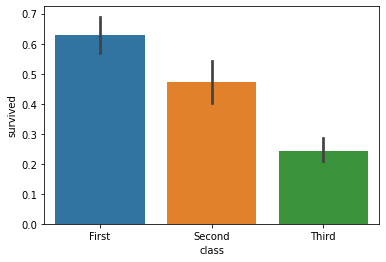

In [8]:
#1
#who survived inside each passenger class
#make a count of each category 
sns.barplot(x='class', y='survived', data=titanic) 

#passenger class - survival of men and women

<AxesSubplot:xlabel='class', ylabel='survived'>

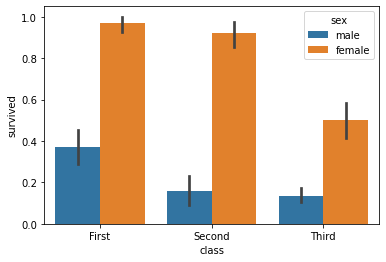

In [9]:
#1
sns.barplot(x='class', y='survived', hue='sex', data=titanic) 

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'alive_no', 'alive_yes']


KeyError: 'Column not found: men_s'

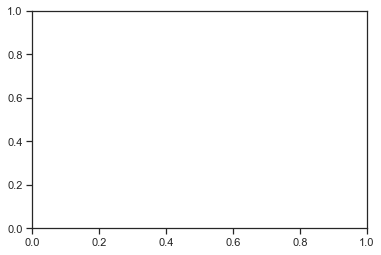

In [20]:
#2 Can you make a boxplot showing the same information (why/why not?).
dummy = pd.get_dummies(titanic)
print(dummy.columns.tolist())

#create variables from 'dummy' to 'titanic'
titanic['class_First']=dummy['class_First']
titanic['class_Second']=dummy['class_Second']
titanic['class_Third']=dummy['class_Third']

#create boxplot
boxplot = titanic.boxplot(column=['men_s'], by=['class_First', 'class_Second', 'class_Third'])
boxplot = titanic.boxplot(column=['class_First', 'class_Second', 'class_Third'], by=['female_s'])

#it is not possible to make a boxplot showing the same information because the values is only 1 or 0. 

<AxesSubplot:xlabel='class', ylabel='fare'>

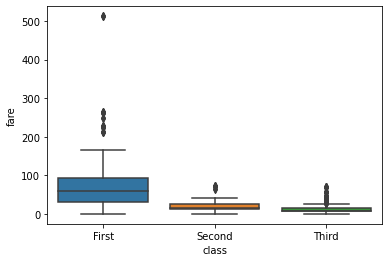

In [11]:
#3 Show a boxplot for the fare-prices within each passenger class.
sns.boxplot(x='class', y='fare', data=titanic) 


<AxesSubplot:xlabel='class', ylabel='fare'>

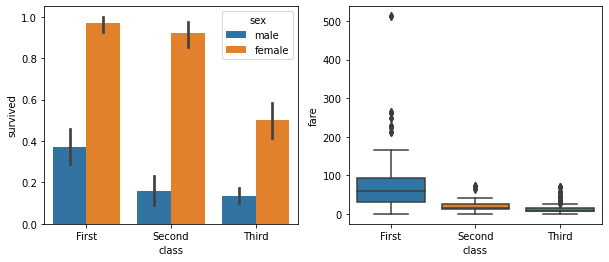

In [12]:
#4
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='class', y='survived', hue='sex', data=titanic, ax=ax[0])
sns.boxplot(x='class', y='fare', data=titanic, ax=ax[1]) 

> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
>
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


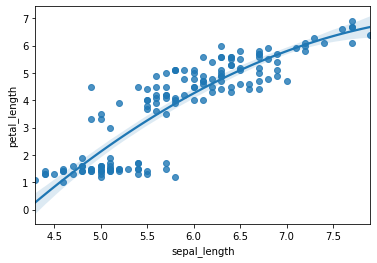

In [13]:
sns.regplot(x='sepal_length', y='petal_length', scatter=True, order=2, data=iris)
#maybe remove outliers for the length and width 
#Moreover we have different species of the iris flower. Might be an idea to make scatterplot for each iris species to make it more accurate. 
print(iris)


> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

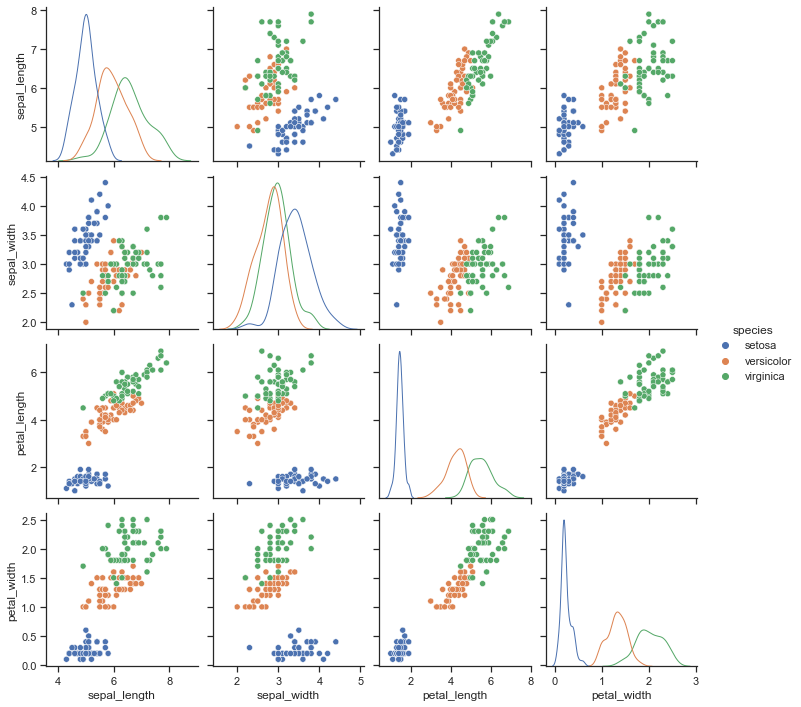

In [14]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(iris, hue='species', diag_kws={'linewidth':1, 'shade': False})
#diag_kws controls the shading and lines of diagonals

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [15]:
# YOUR CODE HERE
import requests
import json


# Mapping exercise
url1 = 'https://job.jobnet.dk/CV/FindWork/Search?Offset=0' #page 0 when you choose Offset=0
response = requests.get(url1)
read_content = response.json()

job_ad_access = read_content['JobPositionPostings'] #only print dict of the job ads

job_ad_access #accessing the ads

#Creating the DataFrame
df_job = pd.DataFrame(job_ad_access) 
df_job.head(20)

,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Generalist med flair for data og formidling ti...,Generalist med flair for data og formidling ti...,Fremtidens økonomistyring er databaseret og gi...,Økonomi,Ved Fjorden 6,6950,Ringkøbing,...,29189609,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401824,https://job.jobnet.dk/CV/FindWork/Details/5401824,True,5401824,56.0865,8.2425
1,0,False,1.0,Tjenere søges til selskabsservering i Rørvig,Tjenere søges til selskabsservering i Rørvig,<p><strong>Temply søger tjenere til jobs i Rør...,Temply ApS,,4581,Rørvig,...,38346598,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401817,https://job.jobnet.dk/CV/FindWork/Details/5401817,True,5401817,56.0104,11.7172
2,0,False,1.0,Vi søger to nye kolleger til introduktionsstil...,Vi søger to nye kolleger til introduktionsstil...,\n\t\n\t\t\n\t\t\t\n\t\t\n\t\n\n\n<p>På pædiat...,Region Sjælland,Fælledvej 13,4200,Slagelse,...,29190658,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401816,https://job.jobnet.dk/CV/FindWork/Details/5401816,True,5401816,55.4008,11.3705
3,0,False,1.0,Administrativ medarbejder til Facility Service...,Administrativ medarbejder til Facility Service...,Trives du med at levere en god administrativ s...,"Professionshøjskolen Absalon, Fællesfunktioner...",Sdr.Stationsvej 30,4200,Slagelse,...,30874323,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401813,https://job.jobnet.dk/CV/FindWork/Details/5401813,True,5401813,55.4071,11.3444
4,0,False,1.0,Tjenere søges til jobs i Helsingør,Tjenere søges til jobs i Helsingør,<p><strong>Temply søger tjenere til jobs i Hel...,Temply ApS,,3000,Helsingør,...,38346598,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401812,https://job.jobnet.dk/CV/FindWork/Details/5401812,True,5401812,56.0394,12.6124
5,0,False,1.0,Rengøringsassistent /Cleaning Staff - Glostrup,Rengøringsassistent /Cleaning Staff - Glostrup,<p>SMP Rengøringsservice søger rengøringsassis...,SMP RENGØRINGSSERVICE ApS,,2600,Glostrup,...,32825893,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401811,https://job.jobnet.dk/CV/FindWork/Details/5401811,True,5401811,55.6742,12.3970
6,0,False,1.0,Økonomikonsulent og leder af sekretariatet,Økonomikonsulent og leder af sekretariatet,<p><strong>Sundhed og Trivsel for børn og unge...,Sundhed og Trivsel,Rådhustorvet 10,6400,Sønderborg,...,29189773,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401431,https://job.jobnet.dk/CV/FindWork/Details/5401431,True,5401431,54.9088,9.7889
7,0,False,1.0,Speditør hos Bring,Speditør hos Bring,Innoflow søger på vegne af Bring \n Løsnings...,Innoflow ApS,Kongens Kvarter 14,7000,Fredericia,...,39234785,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401809,https://job.jobnet.dk/CV/FindWork/Details/5401809,True,5401809,55.5435,9.6622
8,0,False,1.0,Logistikkoordinator,Logistikkoordinator,Innoflow søger på vegne af Bring \n Løsnings...,Innoflow ApS,Kongens Kvarter 14,7000,Fredericia,...,39234785,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401801,https://job.jobnet.dk/CV/FindWork/Details/5401801,True,5401801,55.5435,9.6622
9,0,False,1.0,Reservetjener,Reservetjener,<p><strong>Reservetjener søges til alle vores ...,Knudhule Badehotel ApS,Randersvej 88,8680,Ry,...,32318738,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet

In [ ]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

> **Ex. 6.1.3.:** How many results do you find in total? Store this number as 'TotalResultCount' for later use.

In [16]:
#Total amount of hits
n_listing = read_content['TotalResultCount']
n_listing

22208

## Problems from Exercise Set 7

> **Ex. 7.2.1:** Here we practice locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. Next, use the **>Inspector<** tool (*right click on the table < press inspect element*) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.


In [17]:
import requests
from bs4 import BeautifulSoup
import re
import selenium
import time
import pandas as pd

url =  'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
html = response.text

soup = BeautifulSoup(response.text,'lxml')
soup.find_all('th')[0].text.strip()


Eastern_Conference= []
W = []
L= []
W_L=[]
GB=[]
PSG=[]
PAG=[]
SRS=[]

for i in range(15):
    Eastern_Conference.append(soup.find_all('th',{'class':'left'})[i+1].text.strip())
    W.append(soup.find_all('td',{'data-stat':'wins'})[i].text.strip())
    L.append(soup.find_all('td',{'data-stat':'losses'})[i].text.strip())
    W_L.append(soup.find_all('td',{'data-stat':'win_loss_pct'})[i].text.strip())
    GB.append(soup.find_all('td',{'data-stat':'gb'})[i].text.strip())
    PSG.append(soup.find_all('td',{'data-stat':'pts_per_g'})[i].text.strip())
    PAG.append(soup.find_all('td',{'data-stat':'opp_pts_per_g'})[i].text.strip())
    SRS.append(soup.find_all('td',{'data-stat':'srs'})[i].text.strip())
    

df = pd.DataFrame({'Eastern Conference':Eastern_Conference, 'W':W, 'L':L, 'W/L%':W_L, 'GB':GB, 'PS/G':PSG, 'PA/G':PAG, 'SRS':SRS})
df


,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Toronto Raptors*,59,23,.720,—,111.7,103.9,7.29
1,Boston Celtics*,55,27,.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers*,52,30,.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers*,50,32,.610,9.0,110.9,109.9,0.59
4,Indiana Pacers*,48,34,.585,11.0,105.6,104.2,1.18
5,Miami Heat*,44,38,.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks*,44,38,.537,15.0,106.5,106.8,-0.45
7,Washington Wizards*,43,39,.524,16.0,106.6,106.0,0.53
8,Detroit Pistons,39,43,.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets,36,46,.439,23.0,108.2,108.0,0.07


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import selenium
import time
import pandas as pd

url =  'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
html = response.text

soup = BeautifulSoup(response.text,'lxml')
soup.find_all('div',{'class':'table_wrapper'})[0].text.strip()



